# Compile all model results

In [34]:
import pandas as pd
from glob import glob
from os.path import join, basename
from matplotlib import pyplot as plt
import seaborn as sns


IMPORT DES RESULTATS

In [35]:
MODELS = "/home/tbarba/projects/MultiModalBrainSurvival/outputs"

new_results = glob(join(MODELS, "*/*/multivariate/*WB*over*csv"))
old_results = glob(join(MODELS, "*/*/*/multivariate/*WB*over*csv"))
radiomics = glob(join(MODELS, "radiomics/*/*RAD*over*csv"))
wb = new_results + old_results + radiomics


def import_df(file):

    if "RAD" in file:
        model = "radiomics"
        architecture = "radiomics"
        segmentation = True
        dataset = file.split("/")[7].split("_")[1]
    else:
        model = file.split("/")[7] if file.split("/")[7] != "other" else file.split("/")[8]
        architecture = file.split("/")[6]
        dataset = model.split("_")[1]
        segmentation = True if "_segm" in file else False

    df = pd.read_csv(file)
    df["architecture"] = architecture
    df["dataset"] = dataset
    df["model"] = model
    df["segmentation"] = segmentation
    # df = df.set_index(["architecture", "model", "dataset"])

    df=  df.replace("Gender", "Sex")

    return df


df = pd.concat([import_df(d) for d in wb], axis=0)#.set_index(["dataset", "architecture"]).sort_index()
df["performance"] = df["performance"].astype(float)

ukb_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UKBIOBANK/metadata/0-variable_list.csv", index_col="category").sort_index()
tcga_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/TCGA/metadata/0-variable_list.csv", index_col="category").sort_index()
upenn_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UPENN/metadata/0-variable_list.csv", index_col="category").sort_index()
ucsf_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UCSF/metadata/0-variable_list.csv", index_col="category").sort_index()

variables = pd.concat([ukb_vars, tcga_vars, upenn_vars, ucsf_vars], axis=0).query("keep_model")["var"].reset_index()
df = pd.merge(df, variables, left_on="variable", right_on="var").drop("var", axis=1)

In [24]:
set(df.model)

{'AE_TCGA_segm',
 'AE_UCSF_segm',
 'AE_UKB_segm',
 'AE_UKB_segm_attn',
 'AE_UPENN_segm',
 'UNet_TCGA',
 'UNet_TCGA_segm',
 'UNet_UCSF',
 'UNet_UCSF_segm',
 'UNet_UKB',
 'UNet_UKB_5b4f',
 'UNet_UKB_5b8f',
 'UNet_UKB_6b4f',
 'UNet_UKB_6b8f',
 'UNet_UKB_segm',
 'UNet_UPENN',
 'UNet_UPENN_segm',
 'radiomics',
 'uVAE_UCSF_b1e-3',
 'uVAE_UKB_b1e-3',
 'uVAE_UKB_b1e-4',
 'uVAE_UKB_b1e-4_att'}

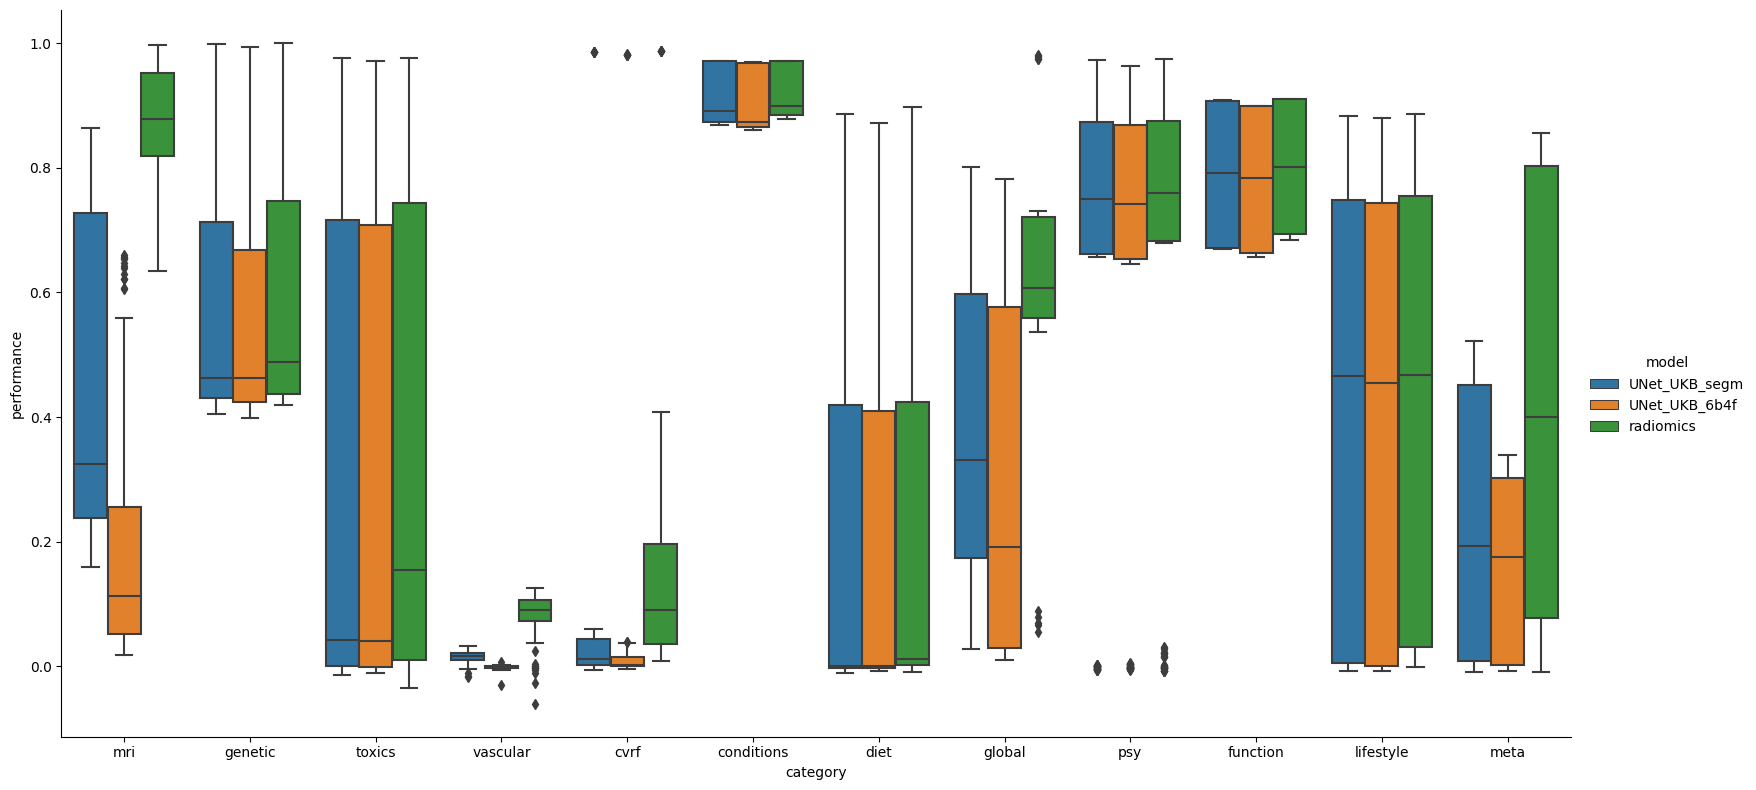

In [36]:
uk_results = df.query("model in ['UNet_UKB_6b4f', 'UNet_UKB_segm', 'radiomics'] and dataset =='UKB'")
g = sns.catplot(x="category", y="performance", hue="model", data=uk_results, kind="box", height=8, aspect=2)


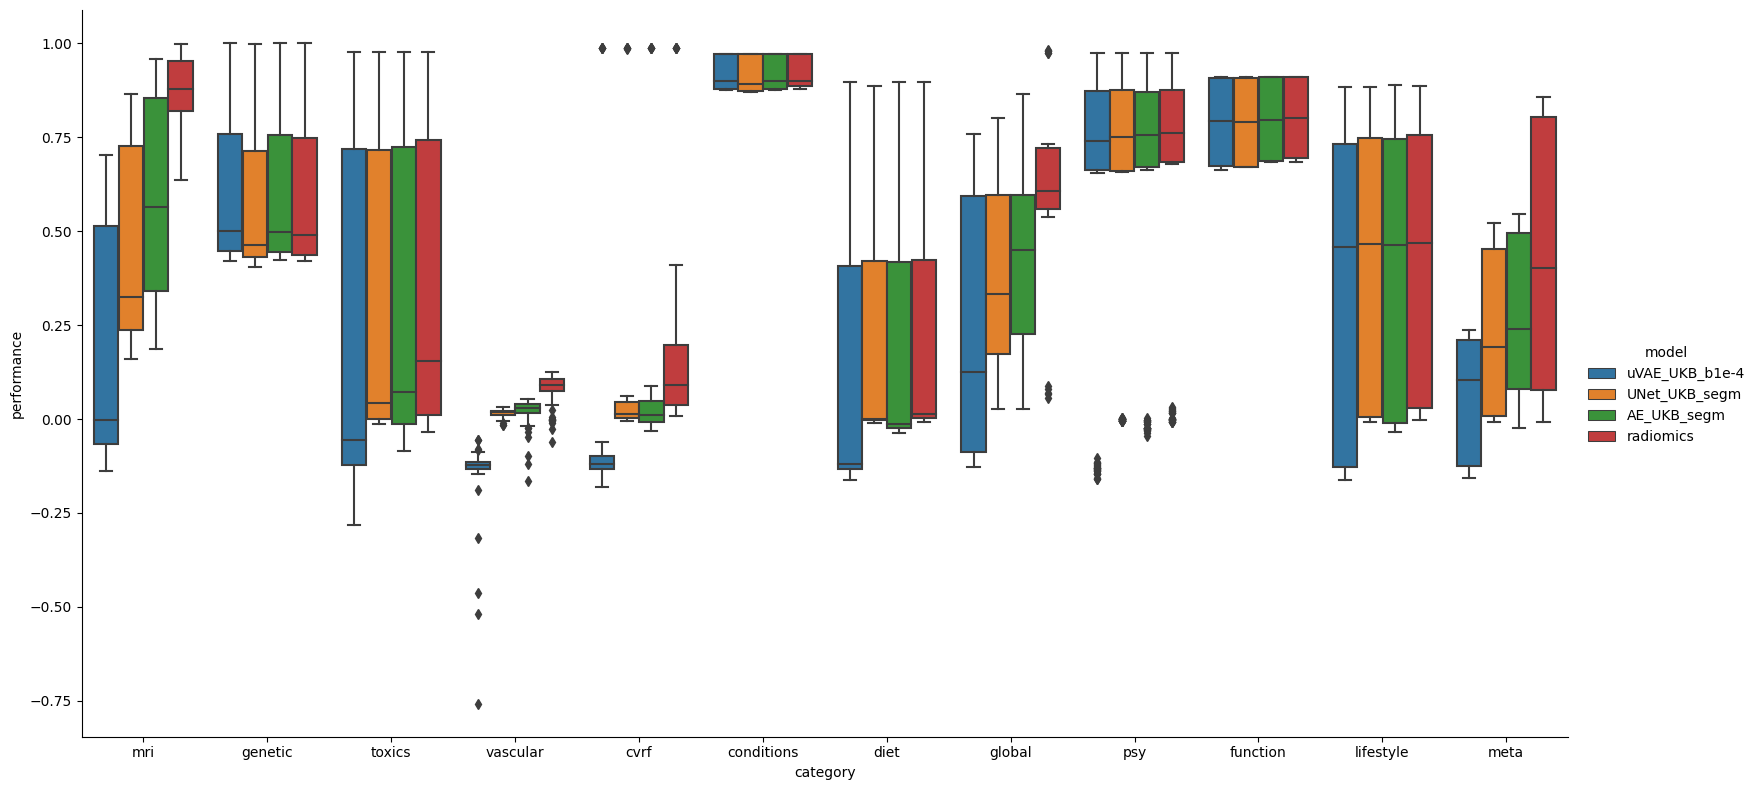

In [37]:
uk_results = df.query("model in ['UNet_UKB_segm', 'AE_UKB_segm', 'uVAE_UKB_b1e-4', 'radiomics'] and dataset =='UKB'")
g = sns.catplot(x="category", y="performance", hue="model", data=uk_results, kind="box", height=8, aspect=2)


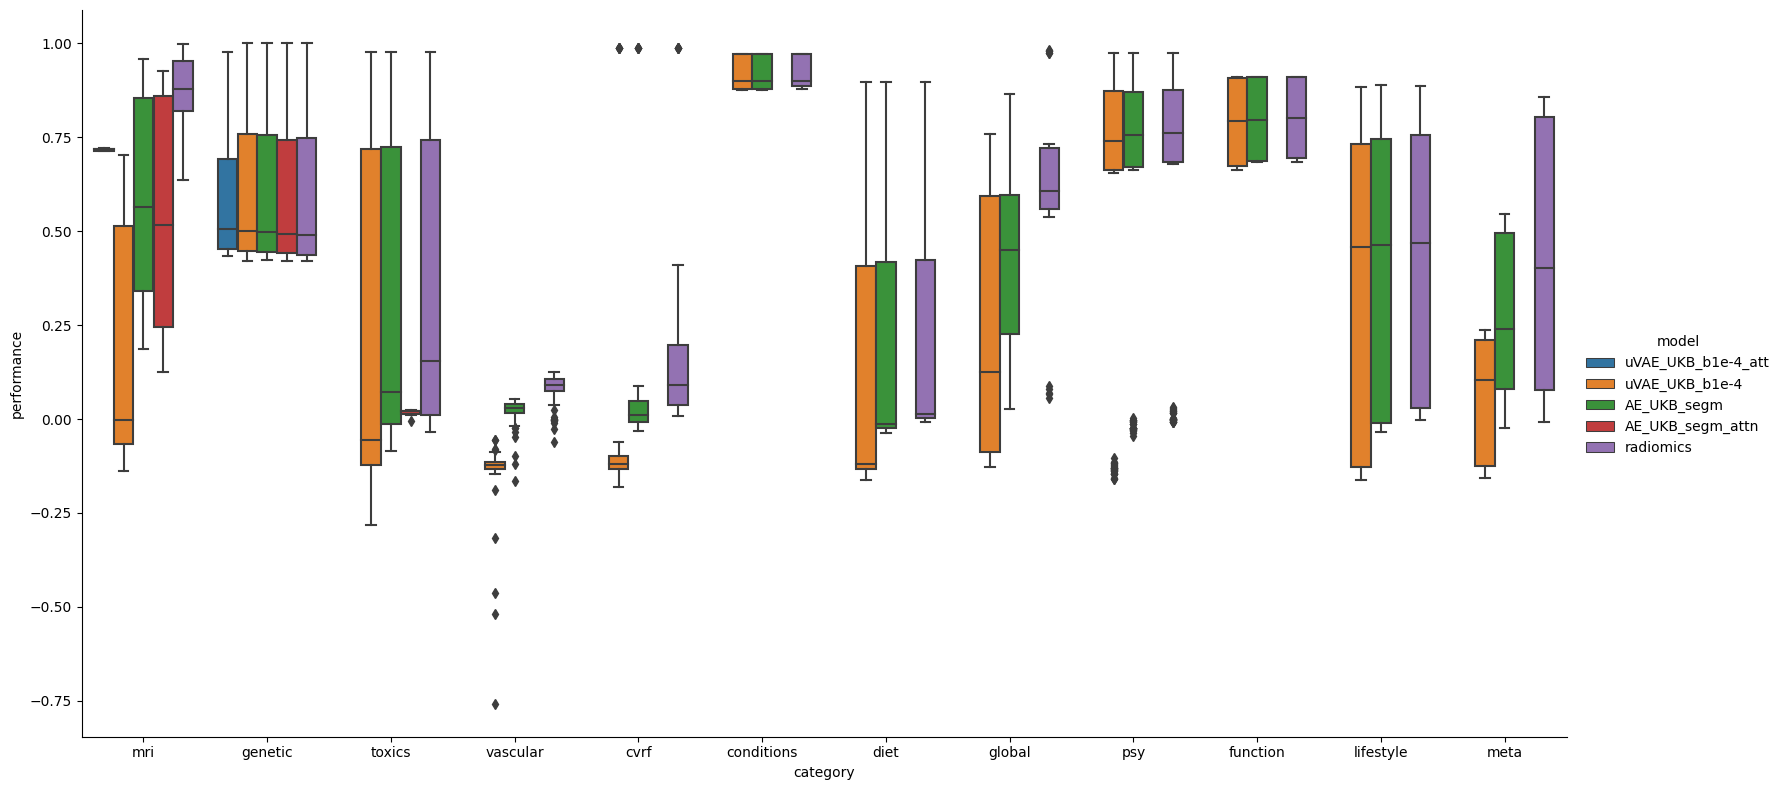

In [38]:
models= ['AE_UKB_segm', 'AE_UKB_segm_attn', 'uVAE_UKB_b1e-4', 'uVAE_UKB_b1e-4_att', 'radiomics']
uk_results = df.query("model in @models and dataset =='UKB'")
g = sns.catplot(x="category", y="performance", hue="model", data=uk_results, kind="box", height=8, aspect=2)


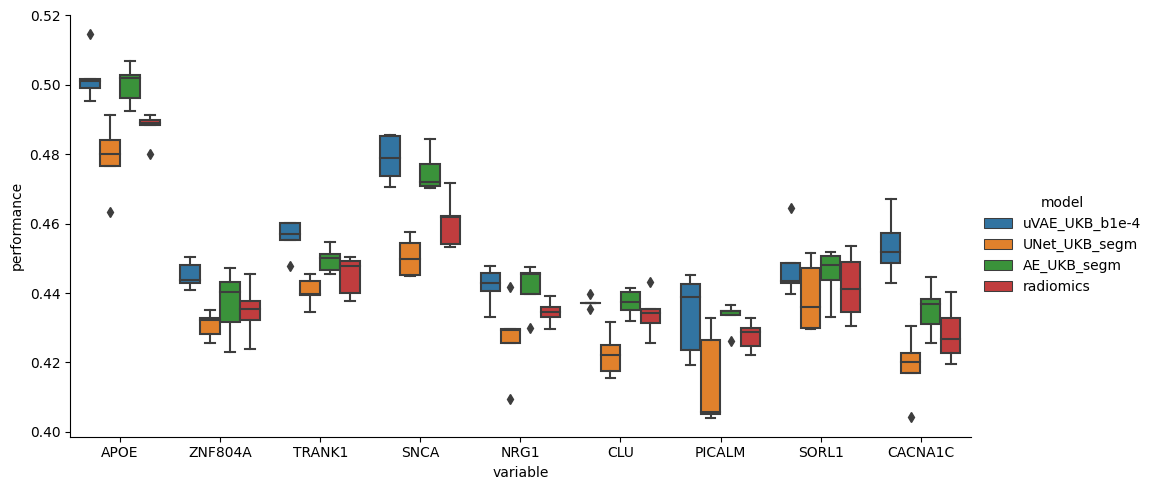

In [39]:
genes = ["CLU","SORL1","PICALM","APOE","TRANK1","CACNA1C", "SNCA","NRG1", "ZNF804A"]
uk_results = df.query("model in ['UNet_UKB_segm', 'AE_UKB_segm', 'uVAE_UKB_b1e-4', 'radiomics'] and dataset =='UKB' and variable in @genes")
g = sns.catplot(x="variable", y="performance", hue="model", data=uk_results, kind="box", height=5, aspect=2)
# g.set_xticklabels(rotation=45)


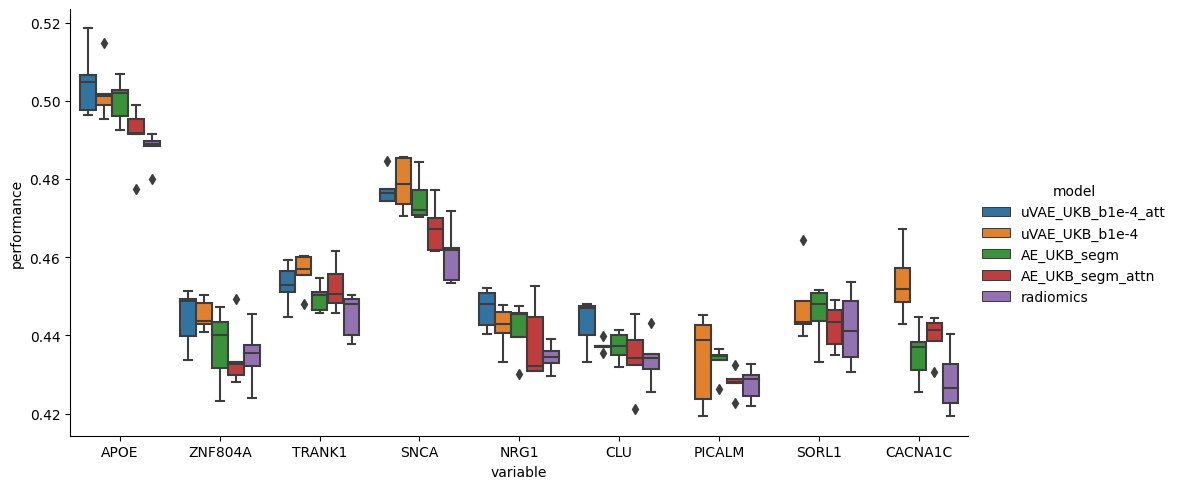

In [42]:
models= ['AE_UKB_segm', 'AE_UKB_segm_attn', 'uVAE_UKB_b1e-4', 'uVAE_UKB_b1e-4_att', 'radiomics']
genes = ["CLU","SORL1","PICALM","APOE","TRANK1","CACNA1C", "SNCA","NRG1", "ZNF804A"]
uk_results = df.query("model in @models and dataset =='UKB' and variable in @genes")
g = sns.catplot(x="variable", y="performance", hue="model", data=uk_results, kind="box", height=5, aspect=2)
# g.set_xticklabels(rotation=45)


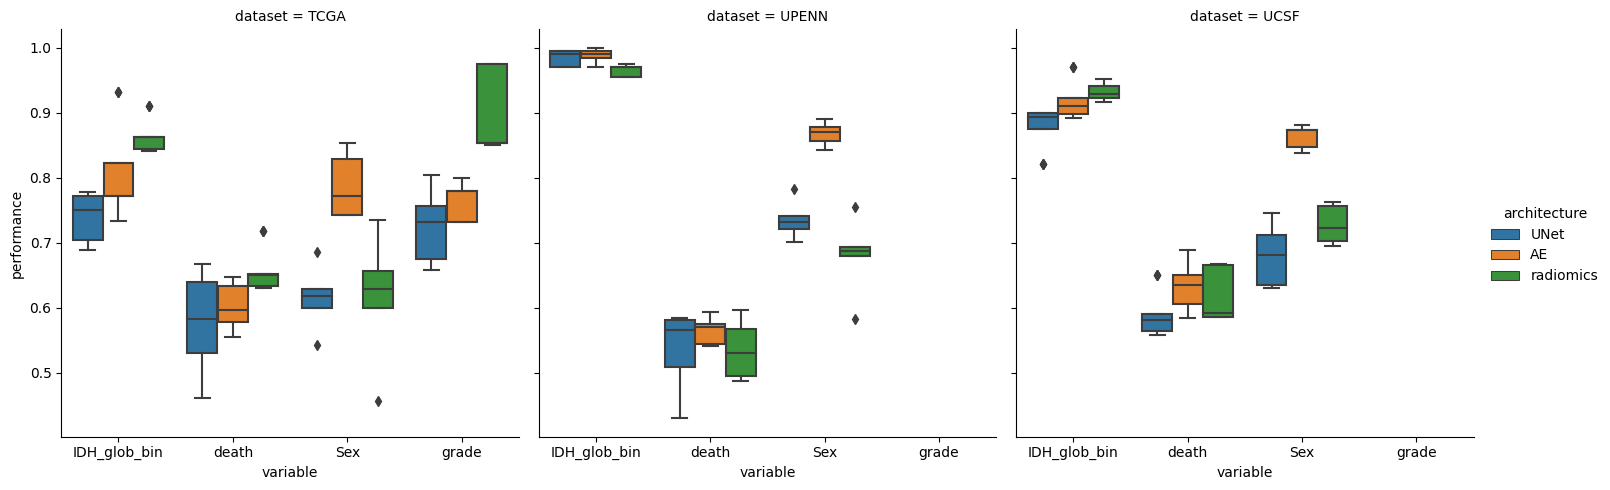

In [41]:
cancer = df.query("dataset in ['UCSF','TCGA', 'UPENN'] and segmentation")
g = sns.catplot(x="variable", y="performance", hue="architecture", col="dataset", data=cancer, kind="box")